In [45]:
%pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [46]:
import gensim
import gensim.downloader

Part 1: Word Embeddings

In [47]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [48]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [49]:
# Ensure the word of choice is in the list of words
if 'word_of_choice' in globals() and 'my_words' in globals() and 'model' in globals():
    if word_of_choice in my_words:
        # Find similar words
        similar_words = model.most_similar(word_of_choice)
        print(f"Most similar words to '{word_of_choice}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity}")
    else:
        print(f"The word '{word_of_choice}' is not in the list of words.")
else:
    print("Please ensure 'word_of_choice', 'my_words', and 'model' are defined and loaded.")

Most similar words to 'king':
  prince: 0.7682328820228577
  queen: 0.7507690787315369
  son: 0.7020888328552246
  brother: 0.6985775232315063
  monarch: 0.6977890729904175
  throne: 0.6919989585876465
  kingdom: 0.6811409592628479
  father: 0.6802029013633728
  emperor: 0.6712858080863953
  ii: 0.6676074266433716


In [50]:
# Ensure the required variables are defined
if 'my_words' in globals() and 'model' in globals():
	# Define the word of choice
	word_of_choice = 'king'

	# Ensure the word of choice is in the list of words
	if word_of_choice in my_words:
		# Find similar words
		similar_words = model.most_similar(word_of_choice)
		print(similar_words)
	else:
		print(f"The word '{word_of_choice}' is not in the list of words.")
else:
	print("Please ensure 'my_words' and 'model' are defined and loaded.")

[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


In [51]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]


[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [52]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [53]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [54]:
# Isolate a specific dimension in the embeddings
# For example, let's isolate the "gender" dimension and add it to multiple words

gender_vector = model["woman"] - model["man"]

words_to_test = ["doctor", "nurse", "teacher", "engineer", "scientist"]
biased_words = {word: model.most_similar(model[word] + gender_vector) for word in words_to_test}

for word, similar_words in biased_words.items():
    print(f"Words similar to {word} with gender bias added:")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity}")
    print()

Words similar to doctor with gender bias added:
  doctor: 0.8661208748817444
  nurse: 0.7757077813148499
  physician: 0.7128061652183533
  woman: 0.7089030742645264
  doctors: 0.6793617010116577
  pregnant: 0.6787967681884766
  patient: 0.6772217750549316
  dentist: 0.6694242358207703
  mother: 0.6586816310882568
  medical: 0.6466937065124512

Words similar to nurse with gender bias added:
  nurse: 0.8992332816123962
  nurses: 0.6888664364814758
  pregnant: 0.688625693321228
  nursing: 0.6761317849159241
  midwife: 0.6643049716949463
  dentist: 0.6424211859703064
  woman: 0.6382318139076233
  therapist: 0.636253297328949
  pediatrician: 0.622150719165802
  doctor: 0.6122641563415527

Words similar to teacher with gender bias added:
  teacher: 0.8804541230201721
  student: 0.7196699380874634
  schoolteacher: 0.6752521395683289
  nurse: 0.6723167896270752
  graduate: 0.65756756067276
  woman: 0.6537830829620361
  mother: 0.6472994685173035
  school: 0.6464943289756775
  kindergarten: 0.6

Part 2: Visualization and Embeddings in Space

In [55]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

!pip install matplotlib


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\hrkis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.1 MB 544.7 kB/s eta 0:00:15
     ---------------------------------------- 0.1/8.1 MB 491.5 kB/s eta 0:00:17
      --------------------------------------- 0.1/8.1 MB 454.0 kB/s eta 0:00:18
      --------------------------------------- 0.2/8.1 MB 573.4 kB/s eta 0:00:14
     - -------------------------------------- 0.2/8.1 MB 724.0 kB/s eta 0:00:11
     - -------------------------------------- 0.4/8.1 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/8.1 MB 1.4 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/8.1 MB 1.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.1/8.1 MB 1.9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/7.8 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 3.3 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 3.5 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 3.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.0 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.8 MB/s eta 0:00:02
   ---------------------------- ----------- 5.5/7.8 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 2.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 2.8 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 2.7 MB/s eta 0:00:01
   ---------------

Matplotlib is building the font cache; this may take a moment.


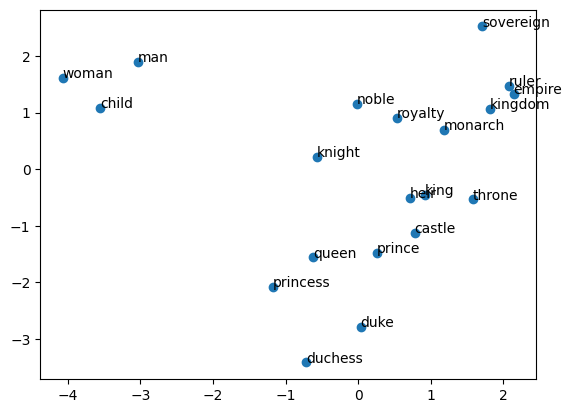

In [56]:
%pip install matplotlib

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define your own set of words
my_words = ["king", "queen", "man", "woman", "child", "prince", "princess", "throne", "castle", "knight", "duke", "duchess", "empire", "kingdom", "monarch", "ruler", "sovereign", "heir", "noble", "royalty"]

# Get the embeddings for the words
X_my_words = [model[word] for word in my_words]

# Perform PCA
pca_my_words = PCA(n_components=2)
X_my_words_pca = pca_my_words.fit_transform(X_my_words)

# Plot the PCA
plt.scatter(X_my_words_pca[:, 0], X_my_words_pca[:, 1])

for i, word in enumerate(my_words):
    plt.annotate(word, (X_my_words_pca[i, 0], X_my_words_pca[i, 1]))

plt.show()

In [ ]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 387.1/387.1MB downloaded


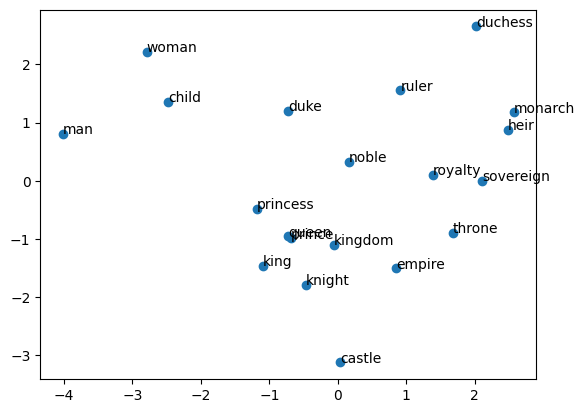

In [58]:
# Load the twitter model
twitter_model = gensim.downloader.load("glove-twitter-100")

# Get the embeddings for the words using the twitter model
X_my_words_twitter = [twitter_model[word] for word in my_words]

# Perform PCA
pca_my_words_twitter = PCA(n_components=2)
X_my_words_twitter_pca = pca_my_words_twitter.fit_transform(X_my_words_twitter)

# Plot the PCA
plt.scatter(X_my_words_twitter_pca[:, 0], X_my_words_twitter_pca[:, 1])

for i, word in enumerate(my_words):
    plt.annotate(word, (X_my_words_twitter_pca[i, 0], X_my_words_twitter_pca[i, 1]))

plt.show()


Part 3: Embedding reddit posts

In [61]:
#read in uiuc csv
import pandas as pd


uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the text data
data['cleaned_text'] = data['text'].apply(clean_text)

# Create a bag of words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_text'])

print(X_bow.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['__' '___' '_guest' ... '숭실' '진리와' '𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮']


In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

c:\Users\hrkis\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\hrkis\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


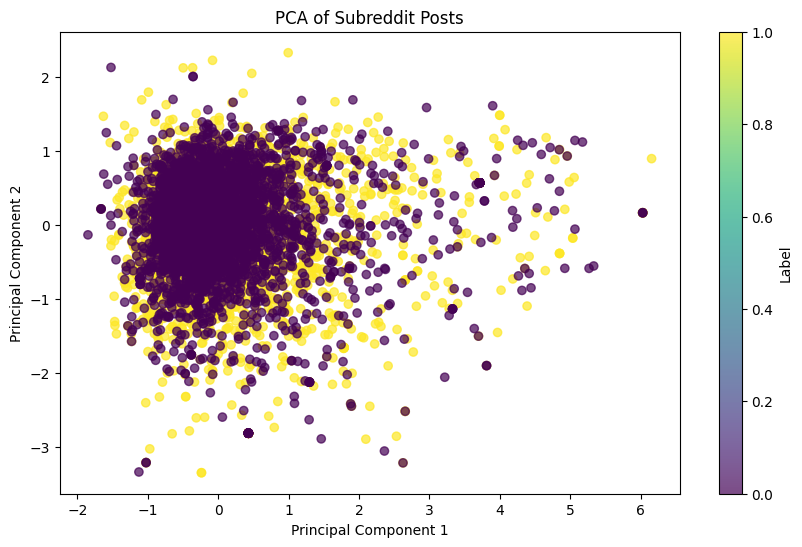

In [64]:
# Ensure the avg_embedding function is defined
if 'avg_embedding' not in globals():
	# Define the avg_embedding function
	import numpy as np
	def avg_embedding(sentence, model):
		words = sentence.split()
		embeddings = [model[word] for word in words if word in model]
		return np.mean(embeddings, axis=0)

# Calculate the average embedding for each post in the dataset
data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

# Remove rows with NaN values in avg_embedding
data = data.dropna(subset=['avg_embedding'])

# Extract the embeddings and labels
embeddings = np.vstack(data['avg_embedding'].values)
labels = data['label'].values

# Perform PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Plot the PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title('PCA of Subreddit Posts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

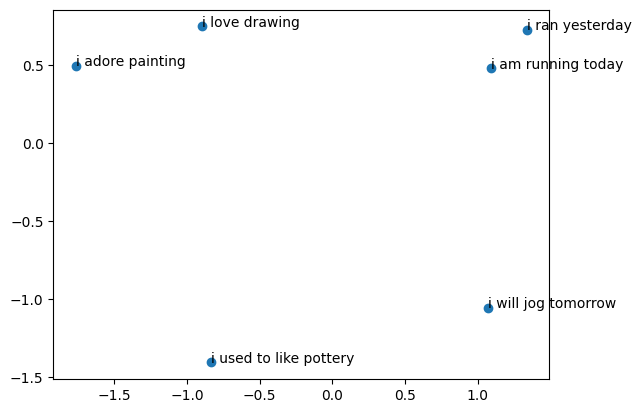

In [65]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

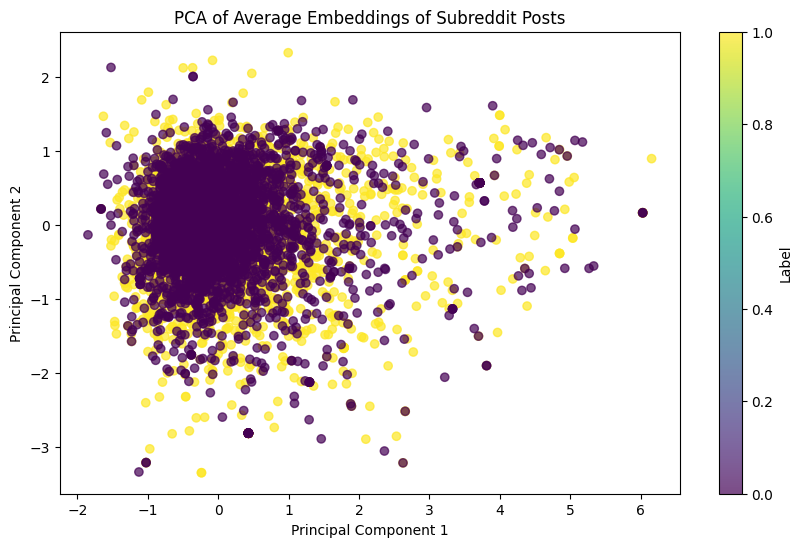

In [66]:
# Calculate the average embedding for each post in the dataset using the avg_embedding function
data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

# Remove rows with NaN values in avg_embedding
data = data.dropna(subset=['avg_embedding'])

# Extract the embeddings and labels
embeddings = np.vstack(data['avg_embedding'].values)
labels = data['label'].values

# Perform PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Plot the PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title('PCA of Average Embeddings of Subreddit Posts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Part 4: HuggingFace and BERT

In [69]:
%pip install transformers 
%pip install torch


   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 2.8 MB/s eta 0:01:13
   ---------------------------------------- 0.8/204.1 MB 3.0 MB/s eta 0:01:07
   ---------------------------------------- 1.8/204.1 MB 2.9 MB/s eta 0:01:11
    --------------------------------------- 2.9/204.1 MB 3.4 MB/s eta 0:00:59
    --------------------------------------- 3.9/204.1 MB 3.7 MB/s eta 0:00:54
    --------------------------------------- 4.7/204.1 MB 3.7 MB/s eta 0:00:55
   - -------------------------------------- 5.2/204.1 MB 3.6 MB/s eta 0:00:56
   - -------------------------------------- 5.2/204.1 MB 3.6 MB/s eta 0:00:56
   - -------------------------------------- 6.0/204.1 MB 3.2 MB/s eta 0:01:03
   - -------------------------------------- 6.8/204.1 MB 3.2 MB/s eta 0:01:02
   - -------------------------------------- 7.6/204.1 MB 3.2 MB/s eta 0:01:02
   - -------------------------------------- 8.4/204.1 MB 3.3 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
#Please wait until after next week to star

# Ensure PyTorch is installed
%pip install torch

# Restart the kernel after running the above line if necessary.

# Use a pipeline as a high-level helper
from transformers import pipeline

# Download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


Note: you may need to restart the kernel to use updated packages.


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

c:\Users\hrkis\anaconda3\envs\is310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hrkis\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [1]:


# Ensure the pipeline is defined
from transformers import pipeline

# Define the pipeline for sentiment analysis
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [6]:
# Ensure the dataset is loaded and prepared
import pandas as pd

# Load the dataset if not already loaded
if 'data' not in globals():
	uiuc = pd.read_csv("uiuc.csv")
	mich = pd.read_csv("umich.csv")
	mich = mich.sample(n=4725)
	uiuc['label'] = 1
	mich['label'] = 0
	data = pd.concat([uiuc, mich])

# Classify the sentiment of all posts in the dataset
def classify_sentiment(text):
    try:
        if isinstance(text, str) and len(text.strip()) > 2:
            result = pipe(text)
            if result and isinstance(result, list) and 'label' in result[0]:
                return result[0]['label']
    except:
        pass
    return 'UNKNOWN'

data['sentiment'] = data['text'].apply(classify_sentiment)

# Report the most common sentiment label
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")

The most common sentiment label is: NEU


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [7]:
# Display ten random sample posts and their sentiment labels
sample_posts = data[['text', 'sentiment']].sample(10, random_state=42)

# Print the sample posts and their labels
for index, row in sample_posts.iterrows():
    print(f"Post: {row['text']}")
    print(f"Sentiment: {row['sentiment']}")
    print("-" * 80)

Post: Not serious
Sentiment: NEG
--------------------------------------------------------------------------------
Post: They've told me and others that charges arn't finalized yet and we'll get an itemized receipt when they are (imo to get the heat off them until they decide they're all actually final later)
Sentiment: NEU
--------------------------------------------------------------------------------
Post: No but I’ve received one 30 mins before the class I wanted started, keep your head up!
Sentiment: NEU
--------------------------------------------------------------------------------
Post: i’m a girl but sure lmfao
Sentiment: NEU
--------------------------------------------------------------------------------
Post: I wanted to know if she’s okay and if she needs it, just in case
Sentiment: NEU
--------------------------------------------------------------------------------
Post: Probably job security
Sentiment: NEU
-------------------------------------------------------------------

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [8]:
# Calculate the proportion of negative sentiment posts for each subreddit
uiuc_negative_ratio = data[data['label'] == 1]['sentiment'].value_counts(normalize=True).get('NEG', 0)
mich_negative_ratio = data[data['label'] == 0]['sentiment'].value_counts(normalize=True).get('NEG', 0)

print(f"Proportion of negative posts in UIUC subreddit: {uiuc_negative_ratio:.2%}")
print(f"Proportion of negative posts in Michigan subreddit: {mich_negative_ratio:.2%}")

# Determine which subreddit is more negative
if uiuc_negative_ratio > mich_negative_ratio:
    print("The UIUC subreddit is more negative.")
elif mich_negative_ratio > uiuc_negative_ratio:
    print("The Michigan subreddit is more negative.")
else:
    print("Both subreddits have the same proportion of negative posts.")

Proportion of negative posts in UIUC subreddit: 23.41%
Proportion of negative posts in Michigan subreddit: 24.30%
The Michigan subreddit is more negative.
